Copyright (C) 2022 E-Scopics. All rights reserved.

This code is the exclusive property of E-Scopics.<br>
For research purposes only. Do not redistribute.

For any question, please contact the author:<br>
Baptiste Hériard-Dubreuil,<br>
<baptiste.heriard-dubreuil@e-scopics.com>


In [1]:
# Load librairies and helpers
import numpy as np
import matplotlib.pyplot as plt

from sos_estimation import *

In [2]:
# Theoretical SOS
c_th = 1540

In [3]:
# Load data
data = np.load('data/simulation.npy', allow_pickle=True).item()

# Get ground truth (and compensate the theoretical depth to match c_th)
y_vec_from_probe = data['sos_map'][0]
sos_map = data['sos_map'][1]
y_vec_from_probe_corrected = y_vec_from_probe[0] + np.cumsum(c_th / sos_map[:-1] * np.diff(y_vec_from_probe))
y_vec_from_probe_corrected = np.concatenate(([y_vec_from_probe[0]], y_vec_from_probe_corrected))

# Get other parameters
iq_data_pw = data['iq_data_pw']
pitch = data['pitch']
excitation_frequency = data['excitation_frequency']
sampling_frequency = data['sampling_frequency']
demod_freq = data['demod_freq']
initial_times = data['initial_times']
angles = data['angles']

n_elem = iq_data_pw.shape[1]

In [4]:
# Set parameters (correlation filter length, mid-angles...) and get SOS
filter_m = 1e-2
filter_sample_nb = int(filter_m * 2 / c_th * sampling_frequency)

gamma_list = np.deg2rad(np.arange(-10, 10, 0.25))

sos = multiple_signals_sos_estimation(iq_data_pw, angles, gamma_list, 
                                    sampling_frequency, demod_freq, 
                                    excitation_frequency, c_th, initial_times, 
                                    pitch, filter_sample_nb)

/home/baptiste/Documents/dev/projects/playground/users/baptiste/rd_env/SoS/2-transmit/refraction_based_sos/processing_steps.py:126: RuntimeWarning: invalid value encountered in sqrt
  sos = c_th * np.sqrt(1 - 2 / (2 * np.pi * central_frequency) *


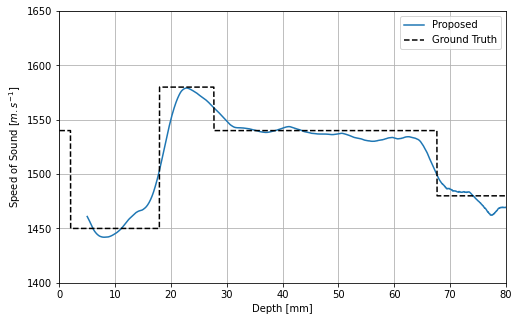

In [5]:
# Display
depth_mm = (np.arange(len(sos)) + filter_sample_nb/2) / sampling_frequency / 2 * c_th * 1e3

plt.figure(figsize=(8, 5))
plt.plot(depth_mm, sos, label='Proposed')
plt.plot(y_vec_from_probe_corrected, sos_map, 'k--', label='Ground Truth')
plt.xlim([0, 80])
plt.ylim([1400, 1650])
plt.xlabel('Depth [mm]')
plt.ylabel('Speed of Sound [$m.s^{-1}$]')
plt.legend()
plt.grid('on')